# An√°lise P√≥s-Transforma√ß√£o dos Dados de Livros

Este notebook explora os dados ap√≥s a aplica√ß√£o da pipeline de transforma√ß√£o, analisando:
- As features criadas pela pipeline
- Distribui√ß√µes das novas colunas
- Qualidade dos dados transformados
- Correla√ß√µes entre features
- Visualiza√ß√µes das principais caracter√≠sticas

### 1. Importa√ß√£o das Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

### 2. Carregamento dos Datasets Transformados

In [ ]:
print("=== Carregamento dos Datasets ===")

# Dataset original (raw)
df_raw = pl.read_csv("../src/data/raw/all_books_with_images.csv")
print(f"Dataset Original: {df_raw.shape}")

# Dataset processado (ap√≥s limpeza)  
df_processed = pl.read_csv("../src/data/processed/books_processed.csv")
print(f"Dataset Processado: {df_processed.shape}")

# Dataset com features (completo)
df_features = pl.read_csv("../src/data/features/books_features.csv")
print(f"Dataset com Features: {df_features.shape}")

=== Carregamento dos Datasets ===
Dataset Original: (1000, 9)
Dataset Processado: (1000, 10)
Dataset com Features: (1000, 69)


### 3. Vis√£o Geral dos Dados Transformados

In [3]:
print("=== Compara√ß√£o de Datasets ===")
print(f"Original: {df_raw.height} registros, {len(df_raw.columns)} colunas")
print(f"Processado: {df_processed.height} registros, {len(df_processed.columns)} colunas") 
print(f"Com Features: {df_features.height} registros, {len(df_features.columns)} colunas")
print(f"Features Adicionadas: {len(df_features.columns) - len(df_processed.columns)}")

print("\nINSIGHT: Pipeline criou 59 novas features mantendo todos os registros.")

=== Compara√ß√£o de Datasets ===
Original: 1000 registros, 9 colunas
Processado: 1000 registros, 10 colunas
Com Features: 1000 registros, 69 colunas
Features Adicionadas: 59

INSIGHT: Pipeline criou 59 novas features mantendo todos os registros.


#### Visualiza√ß√£o dos dados transformados

In [4]:
print("=== Primeiras linhas do dataset transformado ===")
df_features.head(3)

=== Primeiras linhas do dataset transformado ===


shape: (3, 69)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ id         ‚îÜ title      ‚îÜ price ‚îÜ rating ‚îÜ ‚Ä¶ ‚îÜ category_t ‚îÜ category_t ‚îÜ category_w ‚îÜ category_y ‚îÇ
‚îÇ ---        ‚îÜ ---        ‚îÜ ---   ‚îÜ ---    ‚îÜ   ‚îÜ hriller    ‚îÜ ravel      ‚îÜ omens_fict ‚îÜ oung_adult ‚îÇ
‚îÇ str        ‚îÜ str        ‚îÜ f64   ‚îÜ i64    ‚îÜ   ‚îÜ ---        ‚îÜ ---        ‚îÜ ion        ‚îÜ ---        ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ i64        ‚îÜ i64        ‚îÜ ---        ‚îÜ i64        ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ i64        ‚îÜ            ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ book_53731 ‚îÜ It's Only  ‚îÜ 45.17 ‚îÜ 2      ‚îÜ ‚Ä¶ ‚îÜ 0          ‚îÜ 1          ‚îÜ 0          ‚îÜ 0          ‚îÇ
‚îÇ 879        ‚îÜ the        ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ            ‚îÇ
‚îÇ            ‚îÜ Himalayas  ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ            ‚îÇ
‚îÇ book_0cf21 ‚îÜ Full Moon  ‚îÜ 49.43 ‚îÜ 4      ‚îÜ ‚Ä¶ ‚îÜ 0          ‚îÜ 1          ‚îÜ 0          ‚îÜ 0          ‚îÇ
‚îÇ 8f4        ‚îÜ over       ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ            ‚îÇ
‚îÇ            ‚îÜ Noah‚Äôs     ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ            ‚îÇ
‚îÇ            ‚îÜ Ark: An ‚Ä¶  ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ            ‚îÇ
‚îÇ book_88fd9 ‚îÜ See        ‚îÜ 48.87 ‚îÜ 3      ‚îÜ ‚Ä¶ ‚îÜ 0          ‚îÜ 1          ‚îÜ 0          ‚îÜ 0          ‚îÇ
‚îÇ 56f        ‚îÜ America: A ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ            ‚îÇ
‚îÇ            ‚îÜ Celebratio ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ            ‚îÇ
‚îÇ            ‚îÜ n of ‚Ä¶     ‚îÜ       ‚îÜ        ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ            ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [5]:
print("=== Tipos de dados das colunas ===")
for col in df_features.columns:
    print(f"{col}: {df_features[col].dtype}")
print(f"\nTotal de {len(df_features.columns)} colunas no dataset transformado")

=== Tipos de dados das colunas ===
id: String
title: String
price: Float64
rating: Int64
category: String
image: String
product_page: String
availability: Int64
stock: Int64
image_base64: String
price_range: String
has_subtitle: Boolean
has_series: Boolean
starts_with_the: Boolean
title_length: Int64
title_word_count: Int64
has_numbers: Boolean
rating_category: String
stock_level: String
popularity_score: Float64
category_academic: Int64
category_adult_fiction: Int64
category_art: Int64
category_autobiography: Int64
category_biography: Int64
category_business: Int64
category_childrens: Int64
category_christian: Int64
category_christian_fiction: Int64
category_classics: Int64
category_contemporary: Int64
category_crime: Int64
category_cultural: Int64
category_erotica: Int64
category_fantasy: Int64
category_fiction: Int64
category_food_and_drink: Int64
category_health: Int64
category_historical: Int64
category_historical_fiction: Int64
category_history: Int64
category_horror: Int64
categ

## 4. An√°lise das Colunas e Features Criadas

In [6]:
print("=== Identifica√ß√£o das Features Criadas ===")

# Colunas base (originais)
colunas_base = ['id', 'title', 'price', 'rating', 'category', 'image', 'product_page', 'availability', 'stock', 'image_base64']
colunas_features = [col for col in df_features.columns if col not in colunas_base]

print(f"Colunas Base: {len(colunas_base)}")
print(f"Features Criadas: {len(colunas_features)}")
print(f"Total: {len(df_features.columns)} colunas")

=== Identifica√ß√£o das Features Criadas ===
Colunas Base: 10
Features Criadas: 59
Total: 69 colunas


In [7]:
print("=== Classifica√ß√£o das Features por Categoria ===")

# Features de pre√ßo
features_price = [col for col in colunas_features if 'price' in col]
print(f"Features de Pre√ßo: {len(features_price)}")
for feature in features_price:
    print(f"  - {feature}")

# Features de t√≠tulo
features_title = [col for col in colunas_features if any(x in col for x in ['title', 'subtitle', 'series', 'the', 'word', 'length', 'numbers'])]
print(f"\nFeatures de T√≠tulo: {len(features_title)}")
for feature in features_title:
    print(f"  - {feature}")

=== Classifica√ß√£o das Features por Categoria ===
Features de Pre√ßo: 1
  - price_range

Features de T√≠tulo: 6
  - has_subtitle
  - has_series
  - starts_with_the
  - title_length
  - title_word_count
  - has_numbers


In [8]:
print("=== Features de Rating e Stock ===")

# Features de rating
features_rating = [col for col in colunas_features if 'rating' in col]
print(f"Features de Rating: {len(features_rating)}")
for feature in features_rating:
    print(f"  - {feature}")

# Features de stock
features_stock = [col for col in colunas_features if 'stock' in col]
print(f"\nFeatures de Stock: {len(features_stock)}")
for feature in features_stock:
    print(f"  - {feature}")

# Feature de popularidade
features_other = [col for col in colunas_features if 'popularity' in col]
print(f"\nOutras Features: {len(features_other)}")
for feature in features_other:
    print(f"  - {feature}")

=== Features de Rating e Stock ===
Features de Rating: 1
  - rating_category

Features de Stock: 1
  - stock_level

Outras Features: 1
  - popularity_score


In [9]:
print("=== An√°lise das Features de Categoria (One-Hot Encoding) ===")

# Features de categoria (one-hot encoded)
features_categories = [col for col in colunas_features if col.startswith('category_')]
print(f"Total de Features de Categoria: {len(features_categories)}")
print(f"Primeiras 10 categorias:")
for cat in features_categories[:10]:
    valor_categoria = cat.replace('category_', '')
    total_livros = df_features[cat].sum()
    print(f"  - {valor_categoria}: {total_livros} livros")

if len(features_categories) > 10:
    print(f"  ... e mais {len(features_categories) - 10} categorias")

=== An√°lise das Features de Categoria (One-Hot Encoding) ===
Total de Features de Categoria: 49
Primeiras 10 categorias:
  - academic: 1 livros
  - adult_fiction: 1 livros
  - art: 8 livros
  - autobiography: 9 livros
  - biography: 5 livros
  - business: 12 livros
  - childrens: 29 livros
  - christian: 3 livros
  - christian_fiction: 6 livros
  - classics: 19 livros
  ... e mais 39 categorias


### 5. Distribui√ß√£o das Features Criadas

In [10]:
print("=== Estat√≠sticas Descritivas das Features de Pre√ßo ===")

# An√°lise das features de pre√ßo
price_features = [col for col in df_features.columns if 'price' in col.lower()]
print(f"Analisando {len(price_features)} features de pre√ßo:")
for feature in price_features:
    print(f"  - {feature}")

print("\nDistribui√ß√£o das faixas de pre√ßo:")
price_range_counts = df_features['price_range'].value_counts().sort('count', descending=True)
for row in price_range_counts.iter_rows():
    faixa, count = row
    print(f"  - {faixa}: {count} livros")

print(f"\nEstat√≠sticas do pre√ßo num√©rico:")
price_stats = df_features.select("price").describe()
print(price_stats)

=== Estat√≠sticas Descritivas das Features de Pre√ßo ===
Analisando 2 features de pre√ßo:
  - price
  - price_range

Distribui√ß√£o das faixas de pre√ßo:
  - M√©dio: 401 livros
  - Alto: 205 livros
  - Premium: 198 livros
  - Baixo: 196 livros

Estat√≠sticas do pre√ßo num√©rico:
shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ price    ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÇ
‚îÇ str        ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 1000.0   ‚îÇ
‚îÇ null_count ‚îÜ 0.0      ‚îÇ
‚îÇ mean       ‚îÜ 35.07035 ‚îÇ
‚îÇ std        ‚îÜ 14.44669 ‚îÇ
‚îÇ min        ‚îÜ 10.0     ‚îÇ
‚îÇ 25%        ‚îÜ 22.11    ‚îÇ
‚îÇ 50%        ‚îÜ 36.0     ‚îÇ
‚îÇ 75%        ‚îÜ 47.44    ‚îÇ
‚îÇ max        ‚îÜ 59.99    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [11]:
print("=== An√°lise das Features de Rating ===")

# Estat√≠sticas das features de rating
print("Features relacionadas a ratings:")
rating_features = [col for col in df_features.columns if 'rating' in col.lower()]
for feature in rating_features:
    print(f"  - {feature}")

print("\nDistribui√ß√£o das categorias de rating:")
rating_counts = df_features['rating_category'].value_counts().sort('count', descending=True)
for row in rating_counts.iter_rows():
    categoria, count = row
    print(f"  - {categoria}: {count} livros")

print(f"\nEstat√≠sticas do rating num√©rico:")
rating_stats = df_features.select("rating").describe()
print(rating_stats)

=== An√°lise das Features de Rating ===
Features relacionadas a ratings:
  - rating
  - rating_category

Distribui√ß√£o das categorias de rating:
  - Muito Baixo: 226 livros
  - M√©dio: 203 livros
  - Baixo: 196 livros
  - Muito Alto: 196 livros
  - Alto: 179 livros

Estat√≠sticas do rating num√©rico:
shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ rating   ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÇ
‚îÇ str        ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 1000.0   ‚îÇ
‚îÇ null_count ‚îÜ 0.0      ‚îÇ
‚îÇ mean       ‚îÜ 2.923    ‚îÇ
‚îÇ std        ‚îÜ 1.434967 ‚îÇ
‚îÇ min        ‚îÜ 1.0      ‚îÇ
‚îÇ 25%        ‚îÜ 2.0      ‚îÇ
‚îÇ 50%        ‚îÜ 3.0      ‚îÇ
‚îÇ 75%        ‚îÜ 4.0      ‚îÇ
‚îÇ max        ‚îÜ 5.0      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [12]:
print("=== An√°lise das Features de T√≠tulo ===")

# Estat√≠sticas das features de t√≠tulo
title_features = [col for col in df_features.columns if 'title' in col.lower()]
print(f"Features relacionadas ao t√≠tulo ({len(title_features)}):")
for feature in title_features:
    print(f"  - {feature}")

print("\nEstat√≠sticas das features num√©ricas de t√≠tulo:")

print("Comprimento do t√≠tulo:")
title_length_stats = df_features.select("title_length").describe()
print(title_length_stats)

print("\nContagem de palavras no t√≠tulo:")
title_word_count_stats = df_features.select("title_word_count").describe()
print(title_word_count_stats)

=== An√°lise das Features de T√≠tulo ===
Features relacionadas ao t√≠tulo (4):
  - title
  - has_subtitle
  - title_length
  - title_word_count

Estat√≠sticas das features num√©ricas de t√≠tulo:
Comprimento do t√≠tulo:
shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ title_length ‚îÇ
‚îÇ ---        ‚îÜ ---          ‚îÇ
‚îÇ str        ‚îÜ f64          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 1000.0       ‚îÇ
‚îÇ null_count ‚îÜ 0.0          ‚îÇ
‚îÇ mean       ‚îÜ 39.097       ‚îÇ
‚îÇ std        ‚îÜ 25.752724    ‚îÇ
‚îÇ min        ‚îÜ 2.0          ‚îÇ
‚îÇ 25%        ‚îÜ 19.0         ‚îÇ
‚îÇ 50%        ‚îÜ 35.0         ‚îÇ
‚îÇ 75%        ‚îÜ 53.0         ‚îÇ
‚îÇ max        ‚îÜ 204.0        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

Contagem de palavras no t√≠tulo:
shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

### Visualiza√ß√µes das Features

In [13]:
print("=== Configura√ß√£o para Visualiza√ß√µes ===")
df_pandas = df_features.to_pandas()

=== Configura√ß√£o para Visualiza√ß√µes ===


=== Visualiza√ß√£o: Distribui√ß√£o de Faixas de Pre√ßo ===


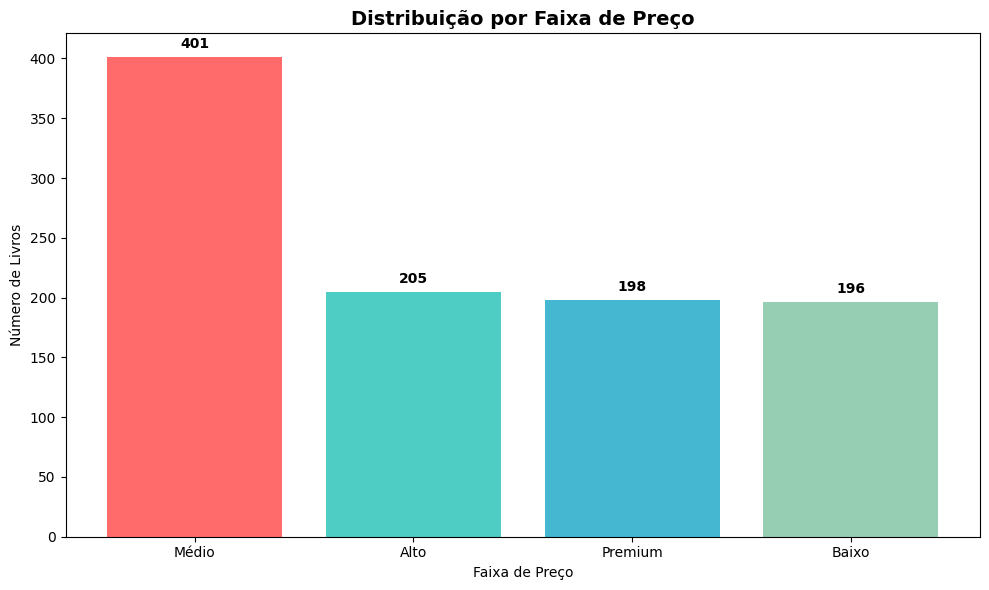

In [14]:
print("=== Visualiza√ß√£o: Distribui√ß√£o de Faixas de Pre√ßo ===")

# Criar gr√°fico para faixas de pre√ßo
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Dados para o gr√°fico
price_range_counts = df_features['price_range'].value_counts().sort('count', descending=True)
categories = price_range_counts['price_range'].to_list()
counts = price_range_counts['count'].to_list()

# Criar gr√°fico de barras
bars = ax.bar(categories, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax.set_title('Distribui√ß√£o por Faixa de Pre√ßo', fontweight='bold', fontsize=14)
ax.set_ylabel('N√∫mero de Livros')
ax.set_xlabel('Faixa de Pre√ßo')

# Adicionar valores nas barras
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

=== Visualiza√ß√£o: Distribui√ß√£o de Categorias de Rating ===


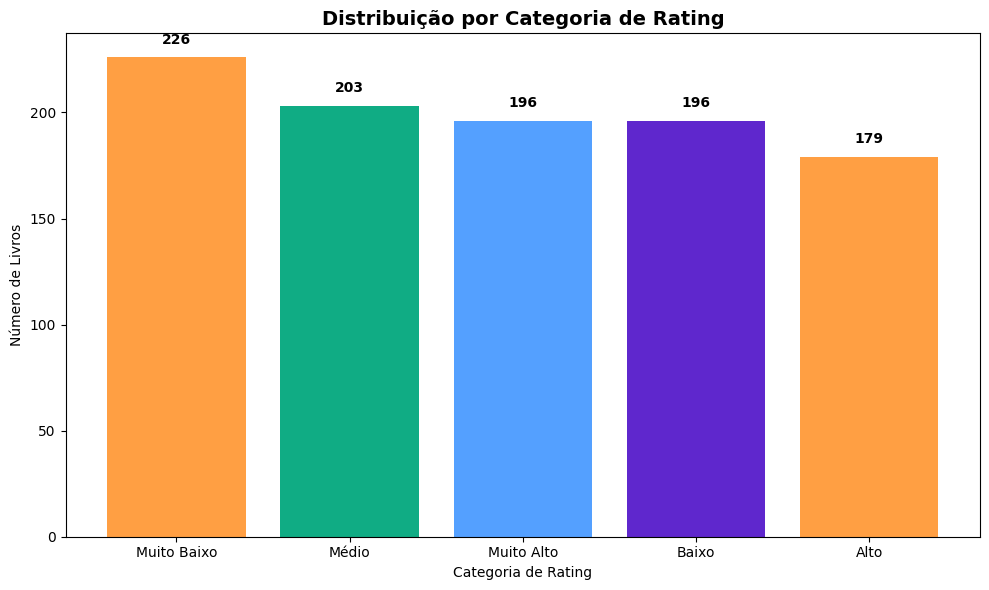

In [15]:
print("=== Visualiza√ß√£o: Distribui√ß√£o de Categorias de Rating ===")

# Criar gr√°fico para categorias de rating
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Dados para o gr√°fico
rating_counts = df_features['rating_category'].value_counts().sort('count', descending=True)
rating_cats = rating_counts['rating_category'].to_list()
rating_cnts = rating_counts['count'].to_list()

# Criar gr√°fico de barras
bars = ax.bar(rating_cats, rating_cnts, color=['#FF9F43', '#10AC84', '#54A0FF', '#5F27CD'])
ax.set_title('Distribui√ß√£o por Categoria de Rating', fontweight='bold', fontsize=14)
ax.set_ylabel('N√∫mero de Livros')
ax.set_xlabel('Categoria de Rating')

# Adicionar valores nas barras
for bar, count in zip(bars, rating_cnts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

=== Visualiza√ß√£o: An√°lise das Features de T√≠tulo ===


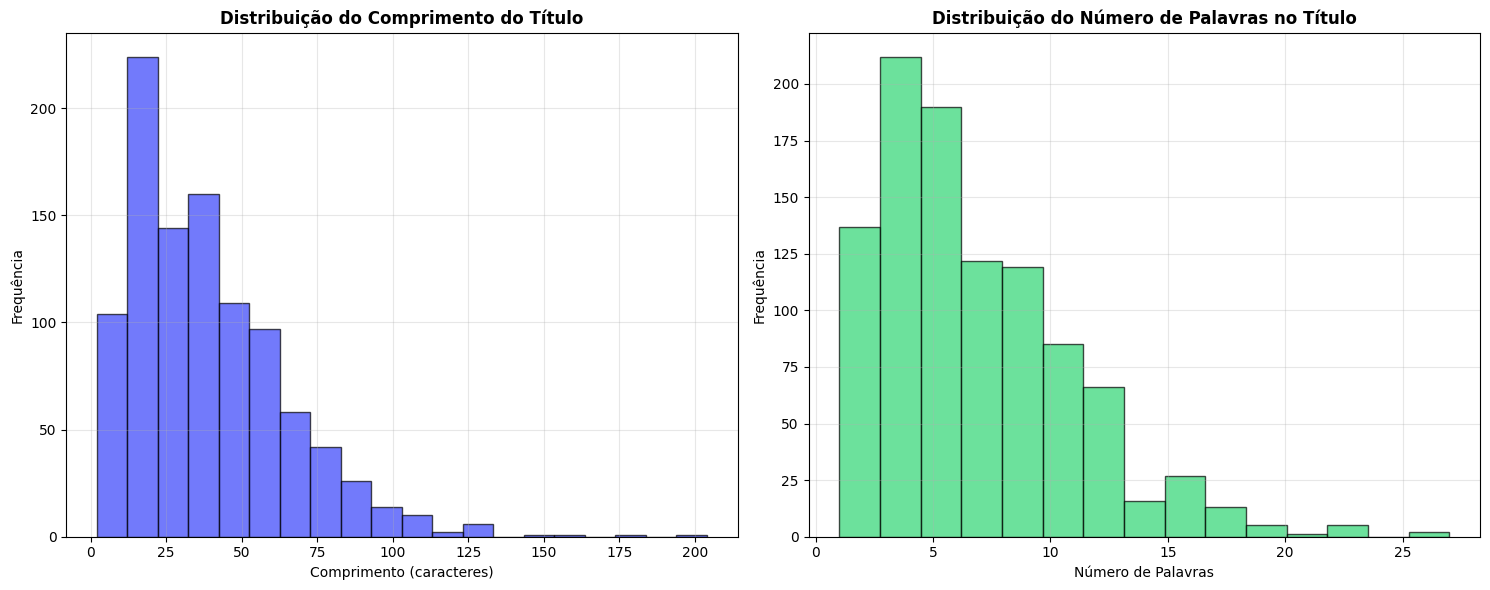

In [16]:
print("=== Visualiza√ß√£o: An√°lise das Features de T√≠tulo ===")

# Criar subplots para features de t√≠tulo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma do comprimento do t√≠tulo
ax1.hist(df_pandas['title_length'], bins=20, color='#3742FA', alpha=0.7, edgecolor='black')
ax1.set_title('Distribui√ß√£o do Comprimento do T√≠tulo', fontweight='bold')
ax1.set_xlabel('Comprimento (caracteres)')
ax1.set_ylabel('Frequ√™ncia')
ax1.grid(True, alpha=0.3)

# Histograma da contagem de palavras
ax2.hist(df_pandas['title_word_count'], bins=15, color='#2ED573', alpha=0.7, edgecolor='black')
ax2.set_title('Distribui√ß√£o do N√∫mero de Palavras no T√≠tulo', fontweight='bold')
ax2.set_xlabel('N√∫mero de Palavras')
ax2.set_ylabel('Frequ√™ncia')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### An√°lise de Correla√ß√µes entre Features

In [17]:
print("=== Prepara√ß√£o dos Dados para An√°lise de Correla√ß√£o ===")

# Selecionar apenas features num√©ricas para correla√ß√£o
numeric_features = [
    'price', 'rating', 'stock', 'title_length', 'title_word_count', 
    'popularity_score', 'availability'
] + [col for col in df_features.columns if col.startswith('has_') or col.startswith('starts_with_')]

print(f"Features selecionadas para correla√ß√£o: {len(numeric_features)}")
print("Features principais:")
for i, feature in enumerate(numeric_features[:10], 1):
    print(f"  {i}. {feature}")

if len(numeric_features) > 10:
    print(f"  ... e mais {len(numeric_features) - 10} features")

# Preparar dados para correla√ß√£o
df_corr = df_features.select(numeric_features).to_pandas()

print(f"\nDataset para correla√ß√£o: {df_corr.shape}")
print("‚úÖ Dados preparados para an√°lise de correla√ß√£o")

=== Prepara√ß√£o dos Dados para An√°lise de Correla√ß√£o ===
Features selecionadas para correla√ß√£o: 11
Features principais:
  1. price
  2. rating
  3. stock
  4. title_length
  5. title_word_count
  6. popularity_score
  7. availability
  8. has_subtitle
  9. has_series
  10. starts_with_the
  ... e mais 1 features

Dataset para correla√ß√£o: (1000, 11)
‚úÖ Dados preparados para an√°lise de correla√ß√£o


In [18]:
print("=== Convers√£o de Tipos para Correla√ß√£o ===")

# Converter booleanos para num√©ricos
bool_columns = []
for col in df_corr.columns:
    if df_corr[col].dtype == 'bool':
        df_corr[col] = df_corr[col].astype(int)
        bool_columns.append(col)

print(f"Colunas booleanas convertidas: {len(bool_columns)}")
if bool_columns:
    for col in bool_columns[:5]:
        print(f"  - {col}")
    if len(bool_columns) > 5:
        print(f"  ... e mais {len(bool_columns) - 5} colunas")

print(f"\nTipos de dados finais:")
print(df_corr.dtypes.value_counts())

=== Convers√£o de Tipos para Correla√ß√£o ===
Colunas booleanas convertidas: 4
  - has_subtitle
  - has_series
  - starts_with_the
  - has_numbers

Tipos de dados finais:
int64      9
float64    2
Name: count, dtype: int64


=== Visualiza√ß√£o: Matriz de Correla√ß√£o ===


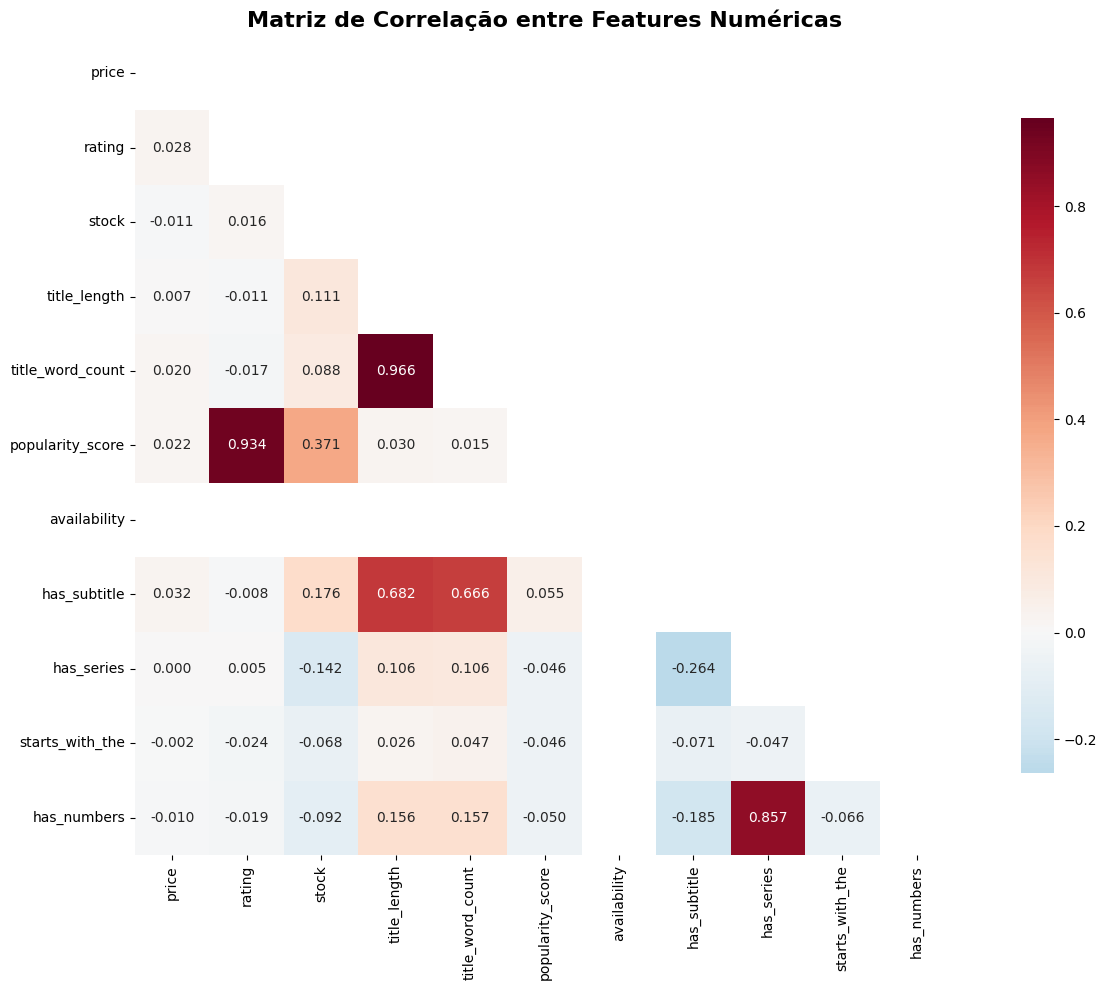

In [19]:
print("=== Visualiza√ß√£o: Matriz de Correla√ß√£o ===")

import numpy as np

# Calcular matriz de correla√ß√£o
correlation_matrix = df_corr.corr()

# Criar visualiza√ß√£o da matriz de correla√ß√£o
plt.figure(figsize=(14, 10))

# M√°scara para mostrar s√≥ metade da matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Criar heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})

plt.title('Matriz de Correla√ß√£o entre Features Num√©ricas', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

## üìã Resumo Estat√≠stico das Features

In [20]:
print("=== Estat√≠sticas das Features Num√©ricas Principais ===")

# Features num√©ricas principais
key_numeric_features = ['price', 'rating', 'stock', 'title_length', 'title_word_count', 'popularity_score']

stats_df = df_features.select(key_numeric_features).describe()
print("Estat√≠sticas descritivas:")
print(stats_df)

print(f"\nResumo das {len(key_numeric_features)} features num√©ricas principais:")
for feature in key_numeric_features:
    mean_val = df_features[feature].mean()
    std_val = df_features[feature].std()
    print(f"  - {feature}: m√©dia={mean_val:.2f}, desvio={std_val:.2f}")

=== Estat√≠sticas das Features Num√©ricas Principais ===
Estat√≠sticas descritivas:
shape: (9, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ price    ‚îÜ rating   ‚îÜ stock    ‚îÜ title_length ‚îÜ title_word_count ‚îÜ popularity_score ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÜ ---      ‚îÜ ---      ‚îÜ ---          ‚îÜ ---              ‚îÜ ---              ‚îÇ
‚îÇ str        ‚îÜ f64      ‚îÜ f64      ‚îÜ f64      ‚îÜ f64          ‚îÜ f64              ‚îÜ f64              ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚

In [21]:
print("=== Distribui√ß√£o das Features Categ√≥ricas ===")

print("Distribui√ß√£o das Faixas de Pre√ßo:")
price_range_dist = df_features['price_range'].value_counts().sort('count', descending=True)
total = price_range_dist['count'].sum()
for row in price_range_dist.iter_rows():
    category, count = row
    percentage = (count / total) * 100
    print(f"  - {category}: {count:,} livros ({percentage:.1f}%)")

print(f"\nDistribui√ß√£o das Categorias de Rating:")
rating_dist = df_features['rating_category'].value_counts().sort('count', descending=True)
for row in rating_dist.iter_rows():
    category, count = row
    percentage = (count / total) * 100
    print(f"  - {category}: {count:,} livros ({percentage:.1f}%)")

=== Distribui√ß√£o das Features Categ√≥ricas ===
Distribui√ß√£o das Faixas de Pre√ßo:
  - M√©dio: 401 livros (40.1%)
  - Alto: 205 livros (20.5%)
  - Premium: 198 livros (19.8%)
  - Baixo: 196 livros (19.6%)

Distribui√ß√£o das Categorias de Rating:
  - Muito Baixo: 226 livros (22.6%)
  - M√©dio: 203 livros (20.3%)
  - Baixo: 196 livros (19.6%)
  - Muito Alto: 196 livros (19.6%)
  - Alto: 179 livros (17.9%)


### Conclus√µes da An√°lise P√≥s-Transforma√ß√£o

In [24]:
print("=== Qualidade dos Dados Transformados ===")

print("üîç VALIDA√á√ÉO DE QUALIDADE:")

# Verificar valores nulos
null_features = df_features.null_count().sum_horizontal()[0]
print(f"  ‚úÖ Valores nulos no dataset final: {null_features}")

# Verificar duplicatas
total_rows = df_features.height
unique_ids = df_features['id'].n_unique()
print(f"  ‚úÖ IDs √∫nicos: {unique_ids} de {total_rows} registros")

# Verificar consist√™ncia de tipos
print("  ‚úÖ Tipos de dados validados:")
print(f"    - Num√©ricas: price, rating, stock, title_length, etc.")
print(f"    - Categ√≥ricas: price_range, rating_category")
print(f"    - Booleanas: has_*, starts_with_*, category_*")

=== Qualidade dos Dados Transformados ===
üîç VALIDA√á√ÉO DE QUALIDADE:
  ‚úÖ Valores nulos no dataset final: 0
  ‚úÖ IDs √∫nicos: 1000 de 1000 registros
  ‚úÖ Tipos de dados validados:
    - Num√©ricas: price, rating, stock, title_length, etc.
    - Categ√≥ricas: price_range, rating_category
    - Booleanas: has_*, starts_with_*, category_*
